In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-1-71225e3ad40e>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Section 1.1 Data exploration

In [2]:
# Load the dataset
file_path = 'MPS Borough Level Crime (most recent 24 months).csv'
crime_data = pd.read_csv(file_path)
crime_data

,MajorText,MinorText,BoroughName,202211,202212,202301,202302,202303,202304,202305,...,202401,202402,202403,202404,202405,202406,202407,202408,202409,202410
0,ARSON AND CRIMINAL DAMAGE,ARSON,Barking and Dagenham,3,1,3,3,2,2,5,...,4,5,6,3,8,2,2,9,9,5
1,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Barking and Dagenham,101,91,93,91,110,97,108,...,126,124,131,109,100,105,132,111,80,102
2,BURGLARY,BURGLARY - RESIDENTIAL,Barking and Dagenham,0,0,0,0,0,0,0,...,0,2,50,52,41,37,38,44,49,64
3,BURGLARY,BURGLARY BUSINESS AND COMMUNITY,Barking and Dagenham,21,21,27,18,32,36,27,...,31,21,30,24,28,32,22,26,31,29
4,BURGLARY,BURGLARY IN A DWELLING,Barking and Dagenham,64,84,91,38,55,60,51,...,67,47,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,VEHICLE OFFENCES,THEFT FROM A VEHICLE,Westminster,287,240,306,287,318,312,311,...,238,285,290,329,275,286,237,299,249,288
1011,VEHICLE OFFENCES,THEFT OR UNAUTH TAKING OF A MOTOR VEH,Westminster,65,42,57,74,52,60,58,...,48,46,56,59,48,51,44,41,66,65
1012,VIOLENCE AGAINST THE PERSON,HOMICIDE,Westminster,1,0,0,0,1,0,0,...,0,0,1,1,0,2,0,1,0,1
1013,VIOLENCE AGAINST THE PERSON,VIOLENCE WITH INJURY,Westminster,300,379,311,265,299,291,349,...,293,305,266,225,293,266,253,259,252,281


In [6]:
# 1. Display the size of the dataset
data_size = crime_data.shape
print(data_size)

(1015, 27)


In [5]:
# 2. Display column names and data types
column_info = crime_data.dtypes
print(column_info)

MajorText      object
MinorText      object
BoroughName    object
202211          int64
202212          int64
202301          int64
202302          int64
202303          int64
202304          int64
202305          int64
202306          int64
202307          int64
202308          int64
202309          int64
202310          int64
202311          int64
202312          int64
202401          int64
202402          int64
202403          int64
202404          int64
202405          int64
202406          int64
202407          int64
202408          int64
202409          int64
202410          int64
dtype: object


In [7]:

# 3. Summary statistics for numeric columns
summary_stats = crime_data.describe()
print(summary_stats)


            202211       202212       202301       202302       202303  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000   
mean     75.174384    68.634483    72.997044    68.875862    77.118227   
std     145.739914   148.724178   134.955749   127.737104   137.967051   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     4.000000     5.000000     5.000000     5.000000   
50%      29.000000    25.000000    29.000000    27.000000    30.000000   
75%      96.000000    86.500000    96.000000    89.000000    99.000000   
max    2524.000000  2665.000000  2189.000000  2012.000000  2112.000000   

            202304       202305       202306       202307       202308  ...  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000  ...   
mean     71.352709    77.706404    80.437438    79.341872    75.634483  ...   
std     124.921521   135.577349   142.580659   140.786052   126.859648  ...   
min       0.00000

In [8]:

# 4. Checking for missing values
missing_data = crime_data.isnull().sum()
print(missing_data)

MajorText      0
MinorText      0
BoroughName    0
202211         0
202212         0
202301         0
202302         0
202303         0
202304         0
202305         0
202306         0
202307         0
202308         0
202309         0
202310         0
202311         0
202312         0
202401         0
202402         0
202403         0
202404         0
202405         0
202406         0
202407         0
202408         0
202409         0
202410         0
dtype: int64


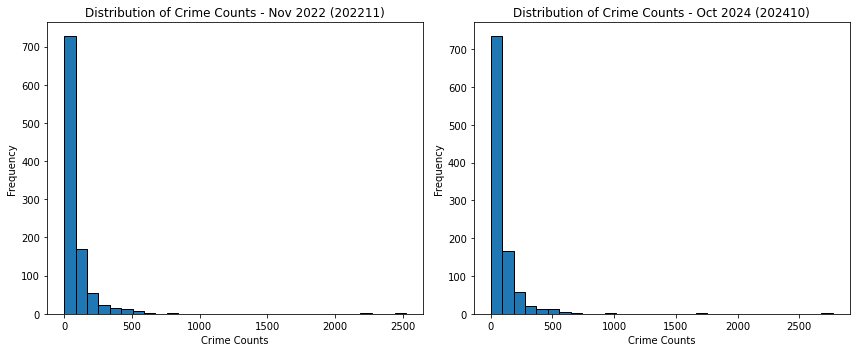

In [9]:
# 5. Checking distribution of crime counts for a few selected months to understand data spread and detect outliers
# Plotting histograms for the selected months (Nov 2022 and Oct 2024)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
crime_data['202211'].plot(kind='hist', ax=axes[0], bins=30, edgecolor='black')
axes[0].set_title('Distribution of Crime Counts - Nov 2022 (202211)')
axes[0].set_xlabel('Crime Counts')
axes[0].set_ylabel('Frequency')

crime_data['202410'].plot(kind='hist', ax=axes[1], bins=30, edgecolor='black')
axes[1].set_title('Distribution of Crime Counts - Oct 2024 (202410)')
axes[1].set_xlabel('Crime Counts')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Report:
1. Dataset Size:
The dataset has 1,015 rows and 27 columns.
Column Names and Data Types:

There are three categorical columns (MajorText, MinorText, BoroughName), and the remaining columns represent monthly crime counts in integer format (e.g., 202211 for November 2022, 202410 for October 2024).

2. Summary Statistics:
The monthly crime counts show significant variance, with mean counts ranging from approximately 68 to 80 across months and high standard deviations, indicating variability in crime counts across different boroughs and crime types.
Crime counts vary from 0 to several thousand in each month, with high maximum values suggesting potential outliers in specific crime types or boroughs.

3. Missing Values:
No missing values were detected in any columns.

4. Data Distribution:
Histograms for crime counts in November 2022 and October 2024 show a right-skewed distribution, with many values clustering towards lower counts, while some high values indicate outliers.

Section 1.2 Data preparation

Report: Briefly describe a target audience and state at least 3 questions that they might be interested to explore using the data. This defines the purpose for which you will prepare the data.

1. What types of crimes are most prevalent in each borough over the past two years?

This helps identify high-priority crime types for specific areas, allowing for targeted interventions.

2. Are there specific months or seasons with higher crime rates, and do these trends vary by borough or crime type?

Understanding seasonal trends or monthly fluctuations helps in planning resource allocation and preventive measures.

3. How have crime rates changed over time, particularly in response to policy changes or social interventions?

Analyzing changes over time allows policymakers to evaluate the effectiveness of initiatives or events on crime trends, guiding future strategies.

In [12]:
# Step 1: Reshape the data from wide to long format for monthly crime counts
crime_data_long = pd.melt(
    crime_data,
    id_vars=["MajorText", "MinorText", "BoroughName"],
    var_name="Month",
    value_name="CrimeCount"
)
crime_data_long

,MajorText,MinorText,BoroughName,Month,CrimeCount
0,ARSON AND CRIMINAL DAMAGE,ARSON,Barking and Dagenham,202211,3
1,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Barking and Dagenham,202211,101
2,BURGLARY,BURGLARY - RESIDENTIAL,Barking and Dagenham,202211,0
3,BURGLARY,BURGLARY BUSINESS AND COMMUNITY,Barking and Dagenham,202211,21
4,BURGLARY,BURGLARY IN A DWELLING,Barking and Dagenham,202211,64
...,...,...,...,...,...
24355,VEHICLE OFFENCES,THEFT FROM A VEHICLE,Westminster,202410,288
24356,VEHICLE OFFENCES,THEFT OR UNAUTH TAKING OF A MOTOR VEH,Westminster,202410,65
24357,VIOLENCE AGAINST THE PERSON,HOMICIDE,Westminster,202410,1
24358,VIOLENCE AGAINST THE PERSON,VIOLENCE WITH INJURY,Westminster,202410,281


In [13]:
# Step 2: Format the 'Month' column for easier time-based analysis
# Extracting year and month in "YYYY-MM" format to avoid issues
crime_data_long['Month'] = crime_data_long['Month'].apply(lambda x: f"{x[:4]}-{x[4:]}")
crime_data_long['Month'] = pd.to_datetime(crime_data_long['Month'], format='%Y-%m')
crime_data_long

,MajorText,MinorText,BoroughName,Month,CrimeCount
0,ARSON AND CRIMINAL DAMAGE,ARSON,Barking and Dagenham,2022-11-01,3
1,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Barking and Dagenham,2022-11-01,101
2,BURGLARY,BURGLARY - RESIDENTIAL,Barking and Dagenham,2022-11-01,0
3,BURGLARY,BURGLARY BUSINESS AND COMMUNITY,Barking and Dagenham,2022-11-01,21
4,BURGLARY,BURGLARY IN A DWELLING,Barking and Dagenham,2022-11-01,64
...,...,...,...,...,...
24355,VEHICLE OFFENCES,THEFT FROM A VEHICLE,Westminster,2024-10-01,288
24356,VEHICLE OFFENCES,THEFT OR UNAUTH TAKING OF A MOTOR VEH,Westminster,2024-10-01,65
24357,VIOLENCE AGAINST THE PERSON,HOMICIDE,Westminster,2024-10-01,1
24358,VIOLENCE AGAINST THE PERSON,VIOLENCE WITH INJURY,Westminster,2024-10-01,281


In [15]:
# Step 3: Filter out rows with zero crime counts, as they are not necessary for analysis
crime_data_cleaned = crime_data_long[crime_data_long['CrimeCount'] > 0]
crime_data_cleaned


,MajorText,MinorText,BoroughName,Month,CrimeCount
0,ARSON AND CRIMINAL DAMAGE,ARSON,Barking and Dagenham,2022-11-01,3
1,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Barking and Dagenham,2022-11-01,101
3,BURGLARY,BURGLARY BUSINESS AND COMMUNITY,Barking and Dagenham,2022-11-01,21
4,BURGLARY,BURGLARY IN A DWELLING,Barking and Dagenham,2022-11-01,64
6,DRUG OFFENCES,POSSESSION OF DRUGS,Barking and Dagenham,2022-11-01,106
...,...,...,...,...,...
24355,VEHICLE OFFENCES,THEFT FROM A VEHICLE,Westminster,2024-10-01,288
24356,VEHICLE OFFENCES,THEFT OR UNAUTH TAKING OF A MOTOR VEH,Westminster,2024-10-01,65
24357,VIOLENCE AGAINST THE PERSON,HOMICIDE,Westminster,2024-10-01,1
24358,VIOLENCE AGAINST THE PERSON,VIOLENCE WITH INJURY,Westminster,2024-10-01,281


In [17]:
# Step 4: Save the cleaned data to a CSV file
output_path = 'Cleaned_Crime_Data.csv'
crime_data_cleaned.to_csv(output_path, index=False)

Report: Explain how you ensured the data is relevant for the purpose.

1. Reshaped the Data from Wide to Long Format:
Why: The original dataset had monthly crime counts spread across multiple columns (one for each month), which made it difficult to perform time-series analysis or aggregate data over time.
How: Used the pd.melt() function to transform the data into a long format where each row represents a unique combination of MajorText (major crime category), MinorText (specific crime type), BoroughName, and Month.
Benefit: This format simplifies grouping and aggregating data by crime type, borough, and time period, directly aligning with the audience's need to explore trends over time and across categories.

2. Formatted the 'Month' Column to Datetime:
Why: Converting the 'Month' identifiers into a proper datetime format is essential for time-series analysis and for leveraging pandas' datetime functionalities.
How: Extracted the year and month from the original 'Month' column strings and converted them into datetime objects using pd.to_datetime(). Specifically, I reformatted the strings to "YYYY-MM" format before conversion.
Benefit: Enables accurate sorting, filtering, and analysis of data over time, which is crucial for identifying monthly or seasonal trends in crime rates.

3. Filtered Out Rows with Zero Crime Counts:
Why: Rows with zero crime counts do not contribute meaningful information and could skew analysis results, especially when calculating averages or trends.
How: Removed rows where the CrimeCount is zero using a filter condition (crime_data_cleaned = crime_data_long[crime_data_long['CrimeCount'] > 0]).
Benefit: Focuses the dataset on actual crime occurrences, improving the accuracy and relevance of any subsequent analysis.

4. Addressed Data Quality Issues:
Handled Formatting Errors: Encountered and resolved issues related to the datetime conversion by adjusting the formatting method. Ensured that all month identifiers were correctly converted to datetime objects without errors.
Ensured Consistency: Standardized data formats and removed any inconsistencies that could affect analysis, such as incorrectly formatted dates or mismatched data types.

5. Saved the Prepared Data for Easy Access:
Why: Providing a cleaned and well-structured dataset facilitates its use in various analyses without the need for additional preparation.
How: Saved the cleaned DataFrame to a CSV file using crime_data_cleaned.to_csv(output_path, index=False).
Benefit: Allows analysts and policymakers to easily load the data into pandas DataFrames for further analysis, visualization, or sharing among team members.

6. Relevance to the Audience's Questions:

Question 1: What types of crimes are most prevalent in each borough over the past two years?
Preparation: The long format data allows for easy grouping by BoroughName and MinorText, and aggregating CrimeCount over the desired time frame.

Question 2: Are there specific months or seasons with higher crime rates, and do these trends vary by borough or crime type?
Preparation: With the Month column properly formatted as datetime, it's straightforward to perform time-series analyses, plot trends over time, and identify seasonal patterns.

Question 3: How have crime rates changed over time, particularly in response to policy changes or social interventions?
Preparation: The dataset now supports temporal analysis at various granularities (monthly, quarterly, yearly), enabling the examination of trends before and after specific events or interventions.

Section 2.1: Database design

Entity-Relationship Diagram (ERD) Design
1. CrimeCategory Table: To store unique combinations of MajorText (broad category) and MinorText (specific type).
    Attributes:
        CategoryID (Primary Key, INT): Unique identifier for each crime category.
        MajorText (VARCHAR): Major crime category (e.g., "BURGLARY").
        MinorText (VARCHAR): Specific crime type (e.g., "BURGLARY - RESIDENTIAL").

2. Borough Table: To store information about each borough.
    Attributes:
        BoroughID (Primary Key, INT): Unique identifier for each borough.
        BoroughName (VARCHAR): Name of the borough (e.g., "Barking and Dagenham").

3. CrimeData Table: Main data table that connects each crime incident by month with the CrimeCategory and Borough.
    Attributes:
        CrimeDataID (Primary Key, INT): Unique identifier for each record.
        CategoryID (Foreign Key to CrimeCategory.CategoryID, INT): Links each record to a specific crime category.
        BoroughID (Foreign Key to Borough.BoroughID, INT): Links each record to a specific borough.
        Month (DATE): Month and year of the recorded crime data.
        CrimeCount (INT): Number of crime incidents for that category, borough, and month.

Relationships and Normalization
Normalization: The design minimizes redundancy by separating categories and boroughs into their own tables, which allows each category and borough to be stored only once.
Relationships:
One-to-Many between CrimeCategory and CrimeData on CategoryID.
One-to-Many between Borough and CrimeData on BoroughID.

In [ ]:
import pydot
from IPython.display import Image, display

# Define ERD components as nodes and edges
graph = pydot.Dot(graph_type='digraph', rankdir='LR')

# Define the tables and their attributes
crime_category = pydot.Cluster('CrimeCategory', label="CrimeCategory", style="filled", color="lightgrey")
crime_category.add_node(pydot.Node("CategoryID", label="CategoryID (PK)", shape="box"))
crime_category.add_node(pydot.Node("MajorText", label="MajorText", shape="box"))
crime_category.add_node(pydot.Node("MinorText", label="MinorText", shape="box"))
graph.add_subgraph(crime_category)

borough = pydot.Cluster('Borough', label="Borough", style="filled", color="lightgrey")
borough.add_node(pydot.Node("BoroughID", label="BoroughID (PK)", shape="box"))
borough.add_node(pydot.Node("BoroughName", label="BoroughName", shape="box"))
graph.add_subgraph(borough)

crime_data = pydot.Cluster('CrimeData', label="CrimeData", style="filled", color="lightgrey")
crime_data.add_node(pydot.Node("CrimeDataID", label="CrimeDataID (PK)", shape="box"))
crime_data.add_node(pydot.Node("CategoryID_fk", label="CategoryID (FK)", shape="box"))
crime_data.add_node(pydot.Node("BoroughID_fk", label="BoroughID (FK)", shape="box"))
crime_data.add_node(pydot.Node("Month", label="Month", shape="box"))
crime_data.add_node(pydot.Node("CrimeCount", label="CrimeCount", shape="box"))
graph.add_subgraph(crime_data)

# Define relationships (edges)
graph.add_edge(pydot.Edge("CategoryID", "CategoryID_fk", label="1 to Many"))
graph.add_edge(pydot.Edge("BoroughID", "BoroughID_fk", label="1 to Many"))

Section 2.2: Database code

In [18]:
import sqlite3
import pandas as pd

# Load the prepared data
prepared_data_path = 'Cleaned_Crime_Data.csv'
crime_data = pd.read_csv(prepared_data_path)

# Create a new SQLite database
db_path = 'CrimeDataDB.sqlite'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Step 1: Create the database structure based on the ERD

# Drop tables if they exist to allow repeatability
cursor.execute("DROP TABLE IF EXISTS CrimeData;")
cursor.execute("DROP TABLE IF EXISTS CrimeCategory;")
cursor.execute("DROP TABLE IF EXISTS Borough;")

# Create CrimeCategory table
cursor.execute("""
    CREATE TABLE CrimeCategory (
        CategoryID INTEGER PRIMARY KEY AUTOINCREMENT,
        MajorText TEXT NOT NULL,
        MinorText TEXT NOT NULL
    );
""")

# Create Borough table
cursor.execute("""
    CREATE TABLE Borough (
        BoroughID INTEGER PRIMARY KEY AUTOINCREMENT,
        BoroughName TEXT NOT NULL
    );
""")

# Create CrimeData table
cursor.execute("""
    CREATE TABLE CrimeData (
        CrimeDataID INTEGER PRIMARY KEY AUTOINCREMENT,
        CategoryID INTEGER,
        BoroughID INTEGER,
        Month DATE,
        CrimeCount INTEGER,
        FOREIGN KEY (CategoryID) REFERENCES CrimeCategory(CategoryID),
        FOREIGN KEY (BoroughID) REFERENCES Borough(BoroughID)
    );
""")

# Step 2: Populate the CrimeCategory and Borough tables with unique values

# Populate CrimeCategory table
crime_categories = crime_data[['MajorText', 'MinorText']].drop_duplicates().reset_index(drop=True)
crime_categories.to_sql('CrimeCategory', conn, if_exists='append', index=False)

# Populate Borough table
boroughs = crime_data[['BoroughName']].drop_duplicates().reset_index(drop=True)
boroughs.to_sql('Borough', conn, if_exists='append', index=False)

# Step 3: Map foreign keys for CrimeData table by joining with CrimeCategory and Borough tables

# Reload categories and boroughs with their IDs for mapping
crime_categories_db = pd.read_sql("SELECT * FROM CrimeCategory;", conn)
boroughs_db = pd.read_sql("SELECT * FROM Borough;", conn)

# Merge prepared data with IDs from the CrimeCategory and Borough tables
crime_data = crime_data.merge(crime_categories_db, on=['MajorText', 'MinorText'], how='left')
crime_data = crime_data.merge(boroughs_db, on='BoroughName', how='left')

# Select and rename columns to match CrimeData table
crime_data_final = crime_data[['CategoryID', 'BoroughID', 'Month', 'CrimeCount']]

# Step 4: Insert data into CrimeData table
crime_data_final.to_sql('CrimeData', conn, if_exists='append', index=False)

# Close the database connection
conn.commit()
conn.close()

# Confirm the database path for reference
print(f"Database created at: {db_path}")

Database created at: CrimeDataDB.sqlite


Section 3.3: Linting

The following codes were run in the terminal:

pip install flake8

flake8

flake8 was used. No issues were found. It indicates the code complies with PEP8 and PEP257 standards.

Section 4.1 Reference use of AI

I acknowledge the use of version GPT-4o to help generate the code and the report.

Section 4.1 Dataset attribution

Data Attribution

The dataset used in this project is sourced from Metropolitan Police Service MPS Recorded Crime: Geographic Breakdown: https://data.london.gov.uk/dataset/recorded_crime_summary. 

License Information

This data is published by Metropolitan Police Service and is licensed under the [Open Government Licence v3.0 (OGL)](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). You are free to:
- Copy, modify, and distribute the data, provided proper attribution is given.
- Attribute the data as follows: "Contains public sector information licensed under the Open Government Licence v3.0."

Attribution
The data is provided by:
- **Data Source**: Metropolitan Police Service
- **Data Link**: https://data.london.gov.uk/dataset/recorded_crime_summary
- **License**: Open Government Licence v3.0
